In [4]:
from environments.PlantSimulator import PlantSimulator
import numpy as np
import matplotlib.pyplot as plt

In [5]:
env = PlantSimulator(plant_id=[1], actions=[0, 1], action_effects=[1.0, 0.0])

#### Test random lighting policies

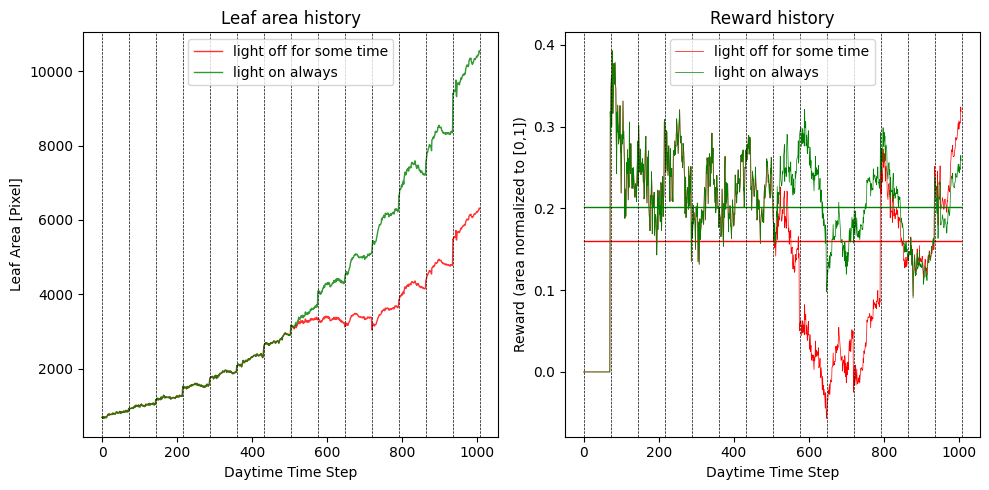

In [6]:
COLORS = ["r", "g"]
LABELS = ["light off for some time", "light on always"]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
policy1 = np.hstack([np.ones(72 * 7), np.zeros(72 * 3), np.ones(1008 - 72 * 10)])
policy2 = np.ones(1008)
policy = [policy1, policy2]
for i in range(2):
    env.start()
    R = []  # reward
    S = []  # observed area
    SS = []  # moving average of observed area
    A = []  # actual area
    State = []
    pol = policy[i]
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(int(pol[_]))
        A.append(env.actual_area(env.time))
        R.append(reward)
        S.append(env.ob[-1])
        SS.append(env.smooth_ob[-1])
        State.append(env.current_state)

    # Plot area history
    ax[0].plot(S, label=LABELS[i], color=COLORS[i], linewidth=1, alpha=0.8)
    # ax[0].plot(SS, color=COLORS[i], linewidth=1)

    # Plot reward history
    ax[1].plot(R, label=LABELS[i], color=COLORS[i], linewidth=0.5)
    ax[1].plot(
        np.arange(len(R)), np.ones(len(R)) * np.mean(R), color=COLORS[i], linewidth=1
    )

for i in range(int(len(R) / env.steps_per_day) + 2):
    ax[0].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
    ax[1].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

ax[1].set_title("Reward history")
ax[1].set_xlabel("Daytime Time Step")
ax[1].set_ylabel("Reward (area normalized to [0,1])")
ax[1].legend()

ax[0].set_title("Leaf area history")
ax[0].set_xlabel("Daytime Time Step")
ax[0].set_ylabel("Leaf Area [Pixel]")
ax[0].legend()

fig.tight_layout()

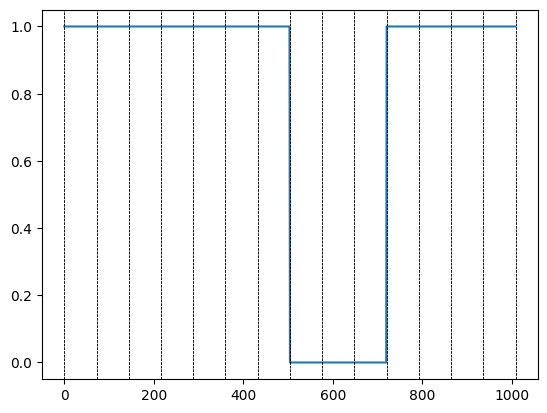

In [7]:
plt.plot(policy1)
for i in range(int(len(R) / env.steps_per_day) + 2):
    plt.axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
    plt.axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

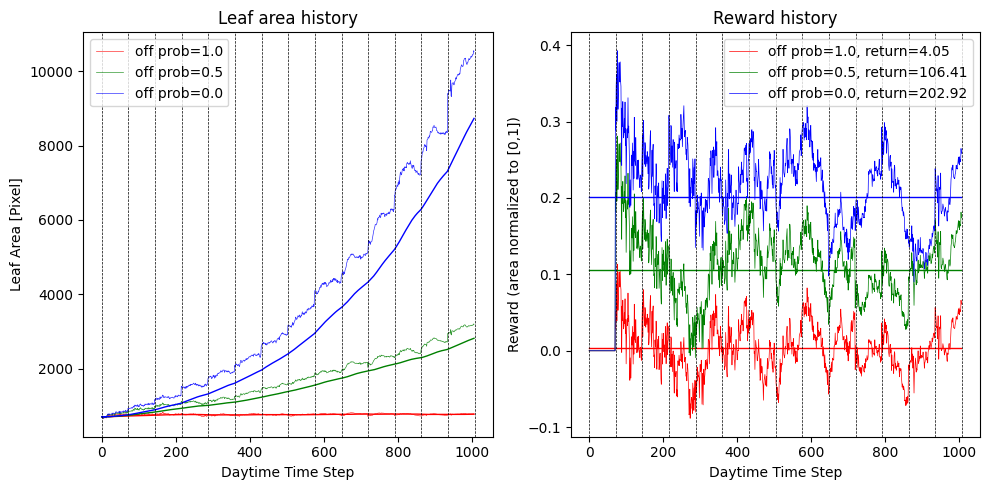

In [8]:
COLORS = ["r", "g", "b"]
off_prob = [1, 0.5, 0]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(len(off_prob)):
    env.start()
    R = []  # reward
    S = []  # observed area
    SS = []  # moving average of observed area
    A = []  # actual area
    State = []
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(
            np.random.choice([0, 1], p=[off_prob[i], 1 - off_prob[i]])
        )
        A.append(env.actual_area(env.time))
        R.append(reward)
        S.append(env.ob[-1])
        SS.append(env.smooth_ob[-1])
        State.append(env.current_state)

    # Plot area history
    ax[0].plot(
        S,
        label=f"off prob={off_prob[i]:.1f}",
        color=COLORS[i],
        linewidth=0.5,
        alpha=0.8,
    )
    ax[0].plot(SS, color=COLORS[i], linewidth=1)

    # Plot reward history
    ax[1].plot(
        R,
        label=f"off prob={off_prob[i]:.1f}, return={np.sum(R):.2f}",
        color=COLORS[i],
        linewidth=0.5,
    )
    ax[1].plot(
        np.arange(len(R)), np.ones(len(R)) * np.mean(R), color=COLORS[i], linewidth=1
    )

for i in range(int(len(R) / env.steps_per_day) + 2):
    ax[0].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
    ax[1].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

ax[1].set_title("Reward history")
ax[1].set_xlabel("Daytime Time Step")
ax[1].set_ylabel("Reward (area normalized to [0,1])")
ax[1].legend()

ax[0].set_title("Leaf area history")
ax[0].set_xlabel("Daytime Time Step")
ax[0].set_ylabel("Leaf Area [Pixel]")
ax[0].legend()

fig.tight_layout()

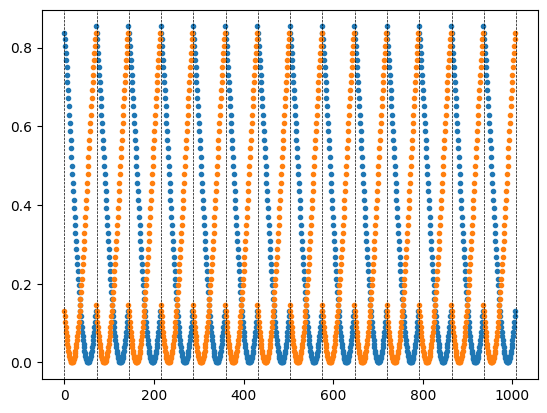

In [9]:
State_array = np.vstack(State)
plt.plot(State_array[:, :2], ".")
for i in range(int(len(R) / env.steps_per_day) + 2):
    plt.axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

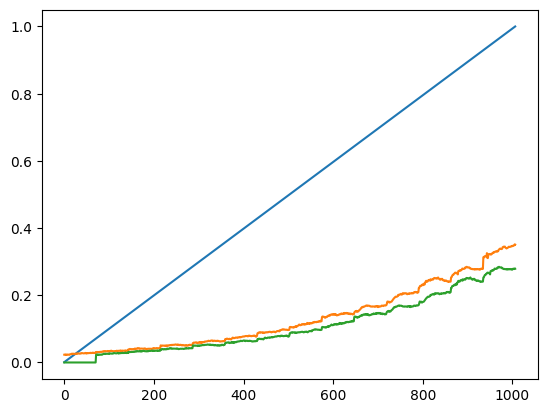

In [10]:
plt.plot(State_array[:, 2:])

#### Correlation between area gain and return

max return is 202.9216117740029


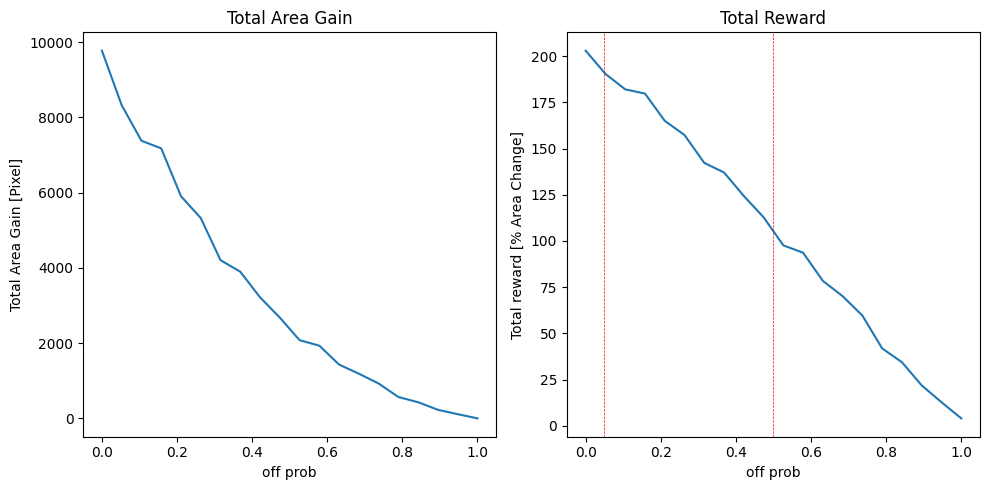

In [11]:
# See if return and total gain in area are positively correlated
num_sample = 20
episodic_return = []
area_gain = []
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for prob in np.linspace(0, 1, num_sample):
    env.start()
    R = []
    A = []
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(
            np.random.choice([0, 1], p=[prob, 1 - prob])
        )
        A.append(env.actual_area(env.time))
        R.append(reward)
    episodic_return.append(np.sum(R))
    area_gain.append(A[-1] - A[0])
print(f"max return is {np.max(episodic_return)}")

ax[0].plot(np.linspace(0, 1, num_sample), area_gain)
ax[0].set_title("Total Area Gain")
ax[0].set_xlabel("off prob")
ax[0].set_ylabel("Total Area Gain [Pixel]")

ax[1].plot(np.linspace(0, 1, num_sample), episodic_return)
ax[1].axvline(x=0.1 / 2, color="r", linestyle="--", linewidth=0.5)
ax[1].axvline(x=0.5, color="r", linestyle="--", linewidth=0.5)
ax[1].set_title("Total Reward")
ax[1].set_xlabel("off prob")
ax[1].set_ylabel("Total reward [% Area Change]")

fig.tight_layout()